<a href="https://colab.research.google.com/github/Marcll0/R/blob/main/Analise_Multivariada_Carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análise de Agrupamento**

Base de dados extraida em: *https://www.kaggle.com/datasets/adrianosantosdev/modelo-de-carros?resource=download*

Fonte de estudo: *https://rpubs.com/Hellen_Silva/987511*

In [38]:
install.packages("corrgram")
install.packages("GGally")
library(corrgram)
library(GGally)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘plyr’


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘GGally’


The following object is masked from ‘package:corrgram’:

    baseball




In [65]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [1]:
df <- read.csv("/content/mt_cars.csv")

In [23]:
nrow(df) # número de observações
ncol(df) # número de variáveis

[1] 32

[1] 12

In [5]:
head(df)

,X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
2,Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
3,Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
4,Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
5,Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
6,Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [6]:
names(df)

[1] "X"    "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"  
[11] "gear" "carb"

In [7]:
summary(df[,2:12])

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

In [9]:
# Padronizacao

df_padrao =scale(df[2:12])

Dendograma

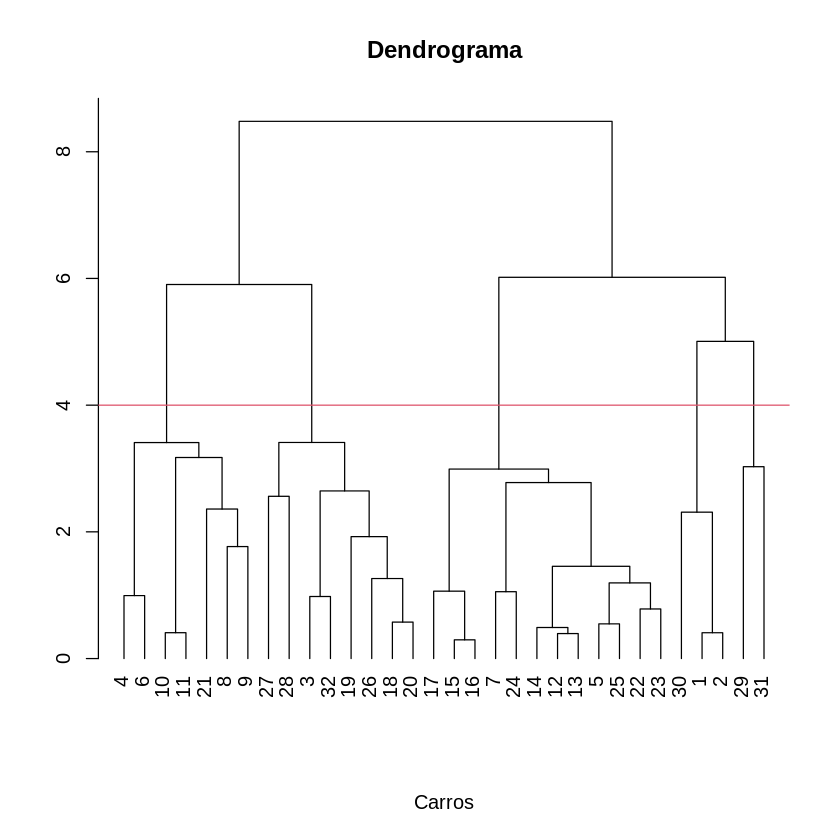

In [10]:
Matriz.dist<-dist(df_padrao, method = "euclidian")
Grupos_complete <- hclust(Matriz.dist, method="complete")
plot(Grupos_complete, hang=-1, main="Dendrograma", sub="", xlab="Carros", ylab="")
abline(4,0,col=2)

In [24]:
# Obtendo o agrupamento

g_complete=cutree(Grupos_complete, k=4)

In [25]:
table(g_complete) ## numero de elementos em cada grupo

g_complete
 1  2  3  4 
 5  8  7 12 

Grupos divididos:

Grupo 1: 30, 1, 2 , 29, 31 \\
Grupo 2: 27, 28, 3, 32, 19, 26, 18, 20 \\
Grupo 3: 4, 6, 10, 11, 21, 8, 9 \\
Grupo 4: 17, 15, 16, 7, 24, 14, 12, 13, 5, 25, 22, 23

Análise do Grupo 1

In [27]:
g1 = df[c(30, 1, 2 , 29, 31),]

In [113]:
g1

,X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,grupo
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>
30,Ferrari Dino,19.7,6,145,175,3.62,2.770,15.50,0,1,5,6,G1
1,Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,G1
2,Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,G1
29,Ford Pantera L,15.8,8,351,264,4.22,3.170,14.50,0,1,5,4,G1
31,Maserati Bora,15.0,8,301,335,3.54,3.570,14.60,0,1,5,8,G1


In [36]:
summary(g1[2:12])

      mpg            cyl           disp             hp             drat      
 Min.   :15.0   Min.   :6.0   Min.   :145.0   Min.   :110.0   Min.   :3.540  
 1st Qu.:15.8   1st Qu.:6.0   1st Qu.:160.0   1st Qu.:110.0   1st Qu.:3.620  
 Median :19.7   Median :6.0   Median :160.0   Median :175.0   Median :3.900  
 Mean   :18.5   Mean   :6.8   Mean   :223.4   Mean   :198.8   Mean   :3.836  
 3rd Qu.:21.0   3rd Qu.:8.0   3rd Qu.:301.0   3rd Qu.:264.0   3rd Qu.:3.900  
 Max.   :21.0   Max.   :8.0   Max.   :351.0   Max.   :335.0   Max.   :4.220  
       wt             qsec             vs          am         gear    
 Min.   :2.620   Min.   :14.50   Min.   :0   Min.   :1   Min.   :4.0  
 1st Qu.:2.770   1st Qu.:14.60   1st Qu.:0   1st Qu.:1   1st Qu.:4.0  
 Median :2.875   Median :15.50   Median :0   Median :1   Median :5.0  
 Mean   :3.001   Mean   :15.62   Mean   :0   Mean   :1   Mean   :4.6  
 3rd Qu.:3.170   3rd Qu.:16.46   3rd Qu.:0   3rd Qu.:1   3rd Qu.:5.0  
 Max.   :3.570   Max.   :17.

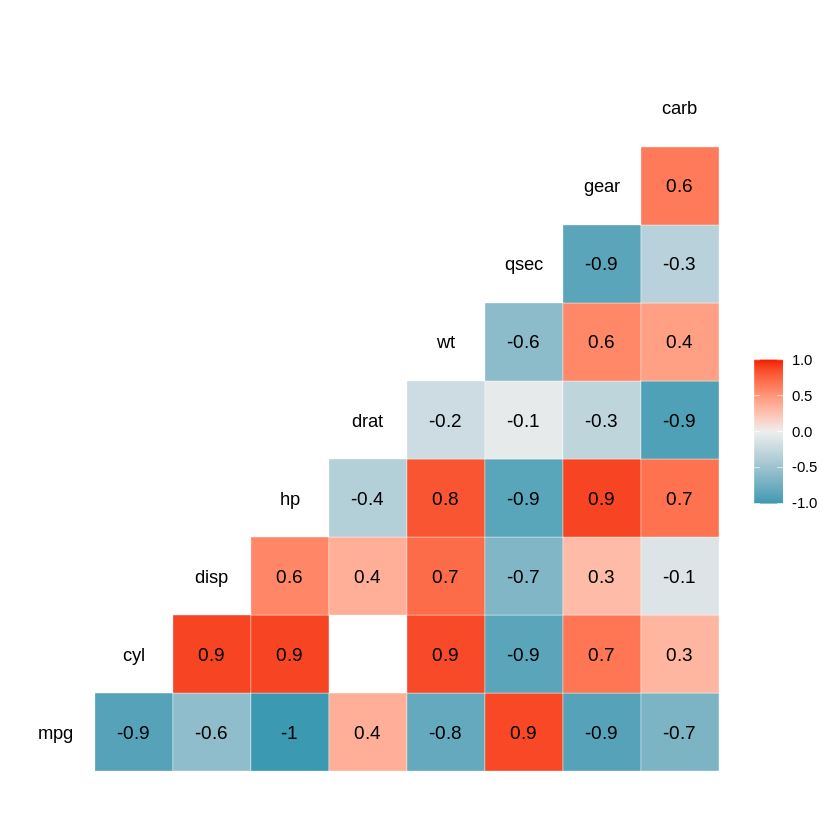

In [43]:
ggcorr(g1[,c(2,3,4,5,6,7,8,11,12)], label=T,method = c("pairwise","spearman"))

Análise do grupo 2

In [44]:
g2 = df[c(27, 28, 3, 32, 19, 26, 18, 20),]

In [115]:
g2

,X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,grupo
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>
27,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2,G2
28,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2,G2
3,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,G2
32,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2,G2
19,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,G2
26,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1,G2
18,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,G2
20,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,G2


In [46]:
summary(g2[2:12])

      mpg             cyl         disp              hp              drat      
 Min.   :21.40   Min.   :4   Min.   : 71.10   Min.   : 52.00   Min.   :3.770  
 1st Qu.:25.20   1st Qu.:4   1st Qu.: 77.95   1st Qu.: 65.75   1st Qu.:4.022  
 Median :28.85   Median :4   Median : 87.05   Median : 78.50   Median :4.095  
 Mean   :28.07   Mean   :4   Mean   : 93.61   Mean   : 81.88   Mean   :4.184  
 3rd Qu.:30.90   3rd Qu.:4   3rd Qu.:111.08   3rd Qu.: 97.00   3rd Qu.:4.272  
 Max.   :33.90   Max.   :4   Max.   :121.00   Max.   :113.00   Max.   :4.930  
       wt             qsec             vs              am         gear     
 Min.   :1.513   Min.   :16.70   Min.   :0.000   Min.   :1   Min.   :4.00  
 1st Qu.:1.780   1st Qu.:18.11   1st Qu.:1.000   1st Qu.:1   1st Qu.:4.00  
 Median :2.038   Median :18.61   Median :1.000   Median :1   Median :4.00  
 Mean   :2.042   Mean   :18.45   Mean   :0.875   Mean   :1   Mean   :4.25  
 3rd Qu.:2.230   3rd Qu.:19.04   3rd Qu.:1.000   3rd Qu.:1   3rd Qu

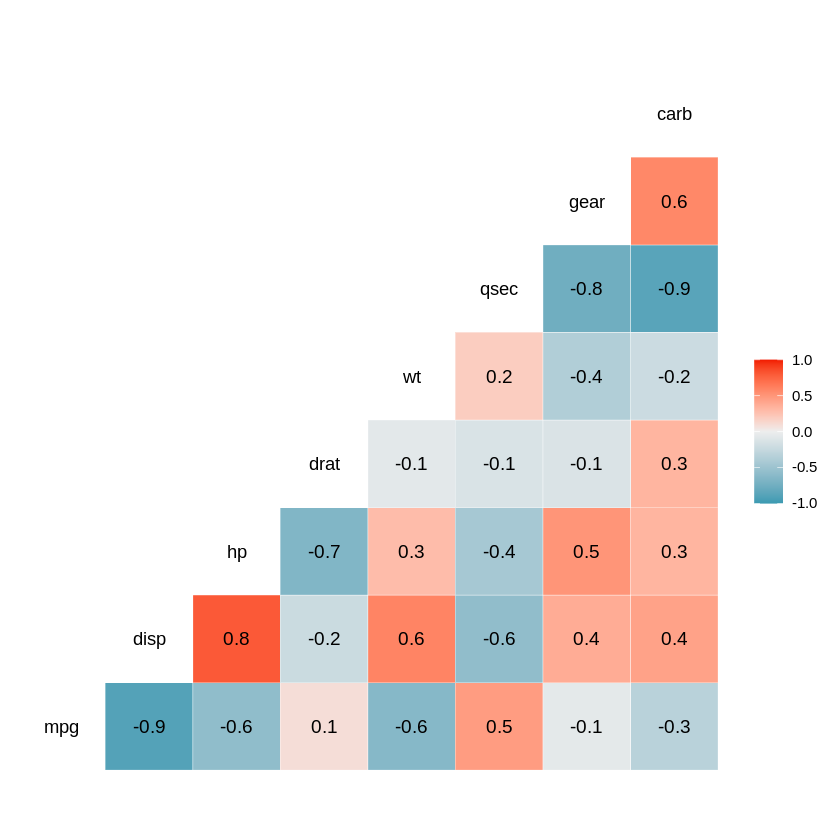

In [49]:
ggcorr(g2[,c(2,4,5,6,7,8,11,12)], label=T,method = c("pairwise","spearman"))

Análise do grupo 3

In [50]:
g3 = df[c(4, 6, 10, 11, 21, 8, 9),]

In [118]:
g3

,X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,grupo
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>
4,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,G3
6,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,G3
10,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,G3
11,Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4,G3
21,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1,G3
8,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,G3
9,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,G3


In [58]:
summary(g3[2:12])

      mpg             cyl             disp             hp       
 Min.   :17.80   Min.   :4.000   Min.   :120.1   Min.   : 62.0  
 1st Qu.:18.65   1st Qu.:4.000   1st Qu.:143.8   1st Qu.: 96.0  
 Median :21.40   Median :6.000   Median :167.6   Median :105.0  
 Mean   :20.74   Mean   :5.143   Mean   :175.1   Mean   :102.1  
 3rd Qu.:22.15   3rd Qu.:6.000   3rd Qu.:196.3   3rd Qu.:116.5  
 Max.   :24.40   Max.   :6.000   Max.   :258.0   Max.   :123.0  
      drat             wt             qsec             vs          am   
 Min.   :2.760   Min.   :2.465   Min.   :18.30   Min.   :1   Min.   :0  
 1st Qu.:3.385   1st Qu.:3.170   1st Qu.:19.17   1st Qu.:1   1st Qu.:0  
 Median :3.700   Median :3.215   Median :20.00   Median :1   Median :0  
 Mean   :3.570   Mean   :3.194   Mean   :19.97   Mean   :1   Mean   :0  
 3rd Qu.:3.920   3rd Qu.:3.440   3rd Qu.:20.11   3rd Qu.:1   3rd Qu.:0  
 Max.   :3.920   Max.   :3.460   Max.   :22.90   Max.   :1   Max.   :0  
      gear            carb      
 

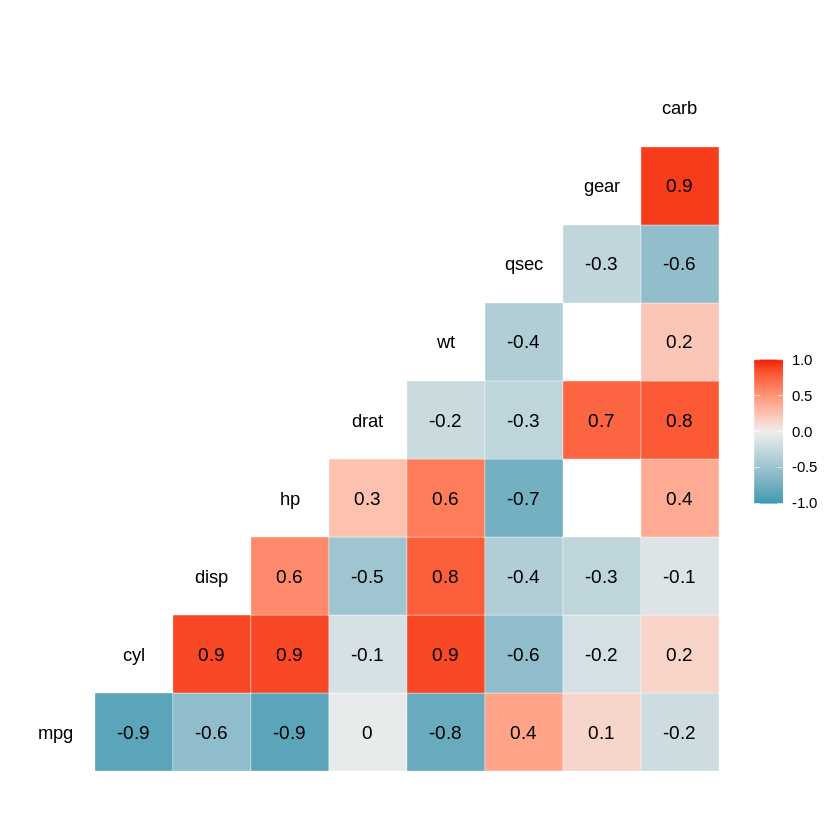

In [55]:
ggcorr(g3[,c(2,3,4,5,6,7,8,11,12)], label=T,method = c("pairwise","spearman"))

Análise do grupo 4

In [56]:
g4 = df[c(17, 15, 16, 7, 24, 14, 12, 13, 5, 25, 22, 23),]

In [120]:
g4

,X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,grupo
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>
17,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4,G4
15,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4,G4
16,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4,G4
7,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,G4
24,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4,G4
14,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3,G4
12,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3,G4
13,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3,G4
5,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,G4


In [59]:
summary(g4[2:12])

      mpg             cyl         disp             hp             drat      
 Min.   :10.40   Min.   :8   Min.   :275.8   Min.   :150.0   Min.   :2.760  
 1st Qu.:14.05   1st Qu.:8   1st Qu.:296.9   1st Qu.:175.0   1st Qu.:3.053  
 Median :15.20   Median :8   Median :355.0   Median :180.0   Median :3.075  
 Mean   :15.05   Mean   :8   Mean   :357.6   Mean   :194.2   Mean   :3.121  
 3rd Qu.:16.62   3rd Qu.:8   3rd Qu.:410.0   3rd Qu.:218.8   3rd Qu.:3.165  
 Max.   :19.20   Max.   :8   Max.   :472.0   Max.   :245.0   Max.   :3.730  
       wt             qsec             vs          am         gear  
 Min.   :3.435   Min.   :15.41   Min.   :0   Min.   :0   Min.   :3  
 1st Qu.:3.558   1st Qu.:16.98   1st Qu.:0   1st Qu.:0   1st Qu.:3  
 Median :3.810   Median :17.35   Median :0   Median :0   Median :3  
 Mean   :4.104   Mean   :17.14   Mean   :0   Mean   :0   Mean   :3  
 3rd Qu.:4.365   3rd Qu.:17.66   3rd Qu.:0   3rd Qu.:0   3rd Qu.:3  
 Max.   :5.424   Max.   :18.00   Max.   :0   Ma

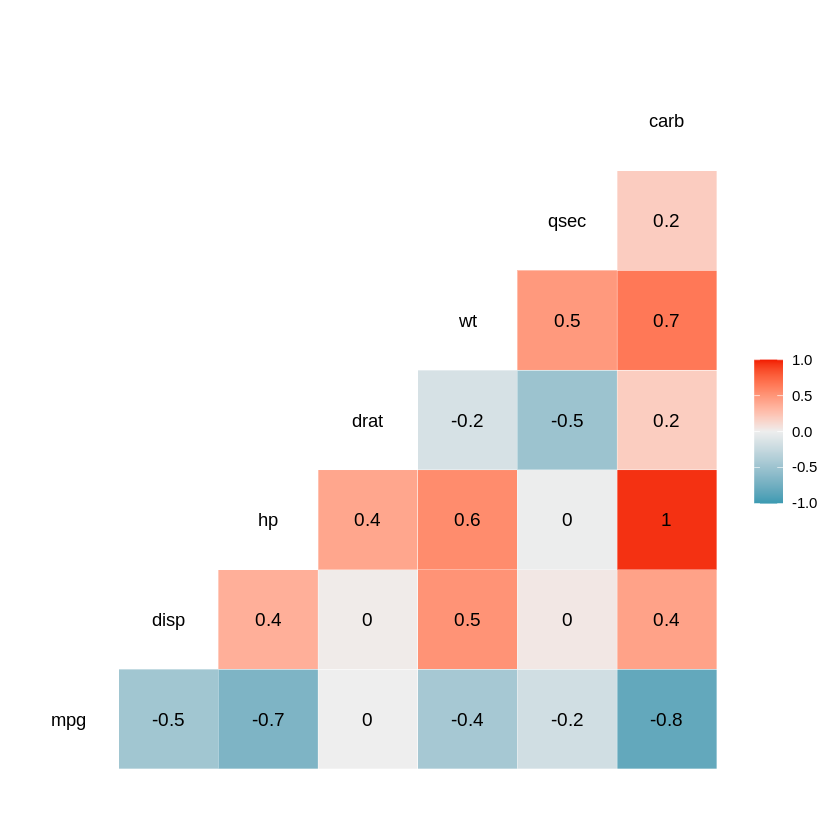

In [62]:
ggcorr(g4[,c(2,4,5,6,7,8,12)], label=T,method = c("pairwise","spearman"))

# Análise por boxplot

In [88]:
g1["grupo"] = c(rep("G1",nrow(g1)))
g2["grupo"] = c(rep("G2",nrow(g2)))
g3["grupo"] = c(rep("G3",nrow(g3)))
g4["grupo"] = c(rep("G4",nrow(g4)))

novo_df = rbind(g1,g2,g3,g4)

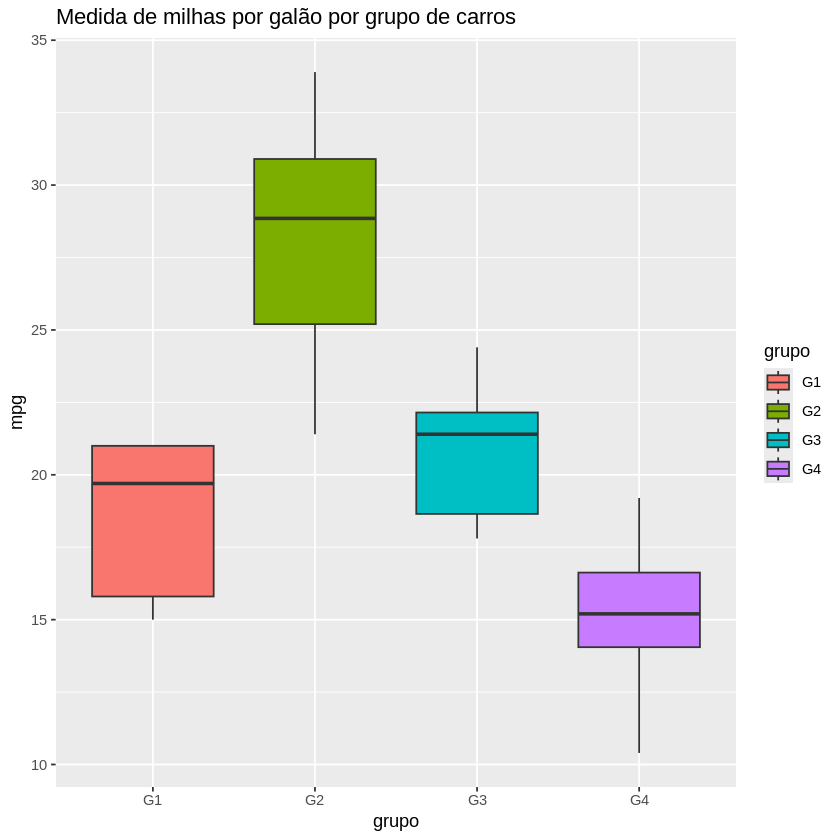

In [116]:
ggplot(novo_df, aes(x=grupo, y=mpg, fill=grupo))+
  geom_boxplot() +
ggtitle('Medida de milhas por galão por grupo de carros')

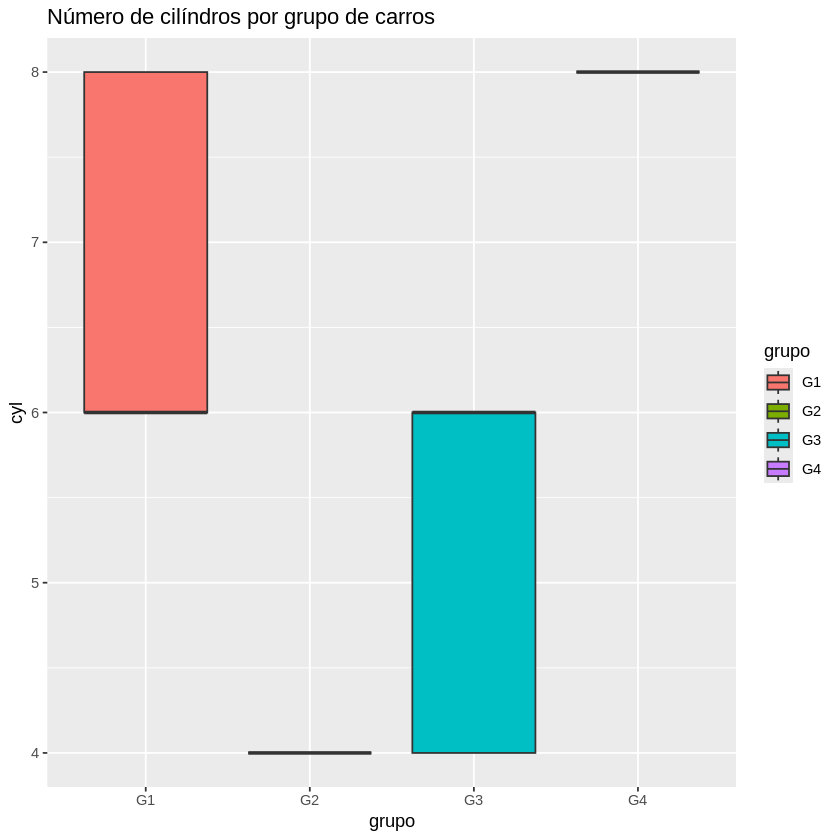

In [102]:
ggplot(novo_df, aes(x=grupo, y=cyl, fill=grupo))+
  geom_boxplot() +
ggtitle('Número de cilíndros por grupo de carros')

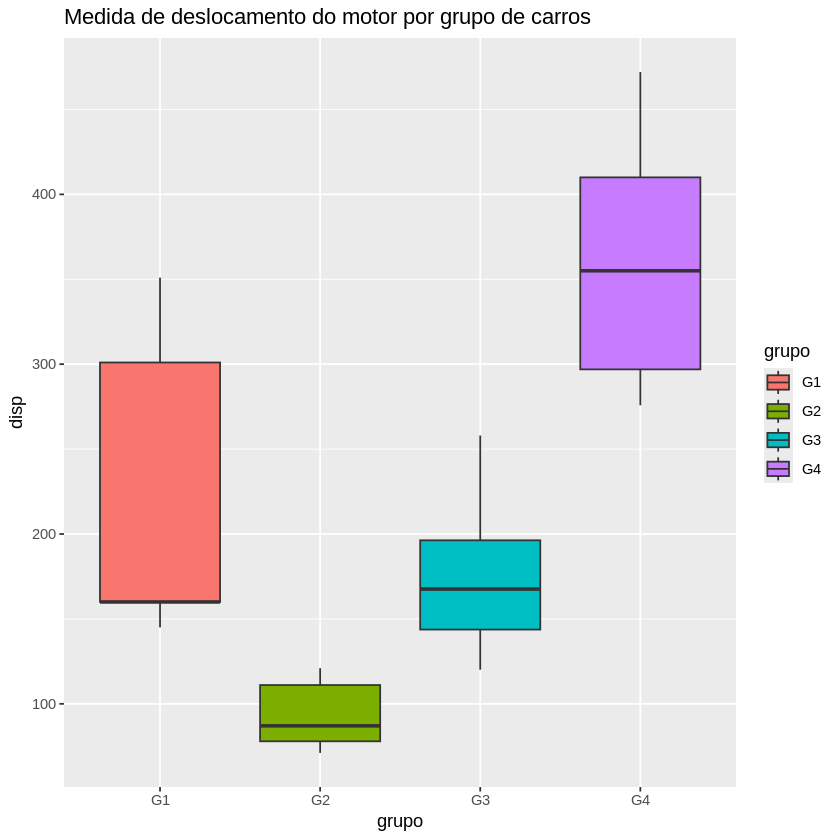

In [103]:
ggplot(novo_df, aes(x=grupo, y=disp, fill=grupo))+
  geom_boxplot() +
ggtitle('Medida de deslocamento do motor por grupo de carros')

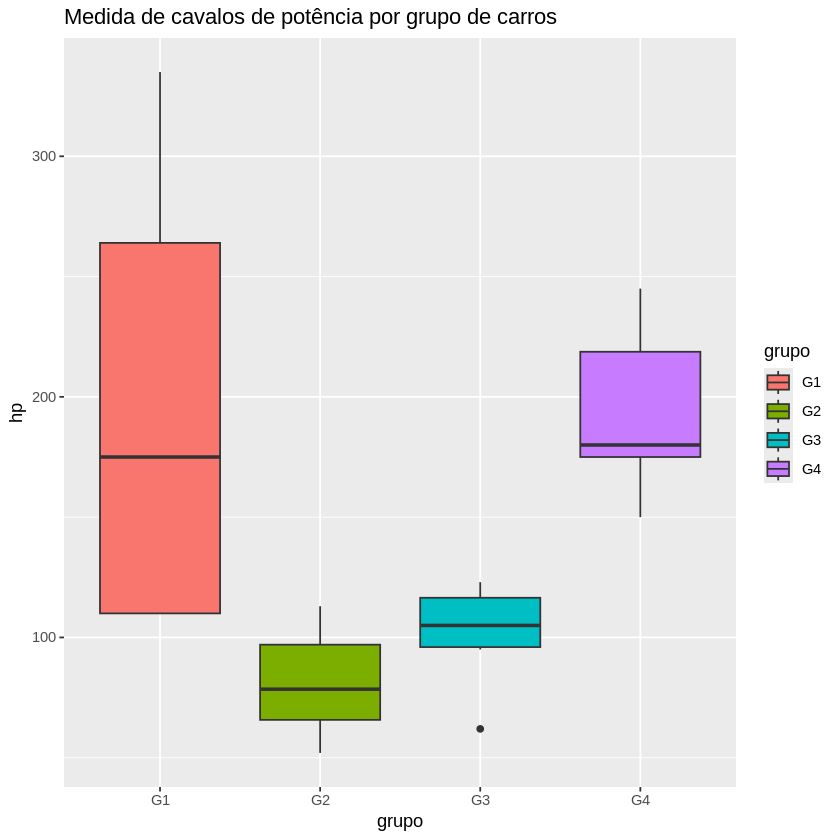

In [104]:
ggplot(novo_df, aes(x=grupo, y=hp, fill=grupo))+
  geom_boxplot() +
ggtitle('Medida de cavalos de potência por grupo de carros')

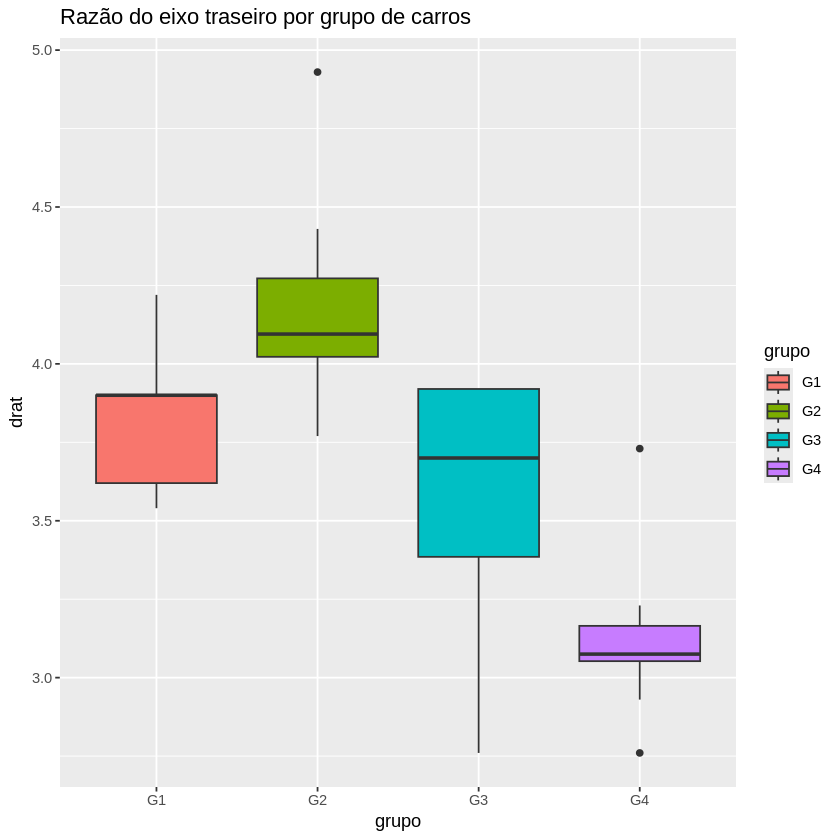

In [105]:
ggplot(novo_df, aes(x=grupo, y=drat, fill=grupo))+
  geom_boxplot() +
ggtitle('Razão do eixo traseiro por grupo de carros')

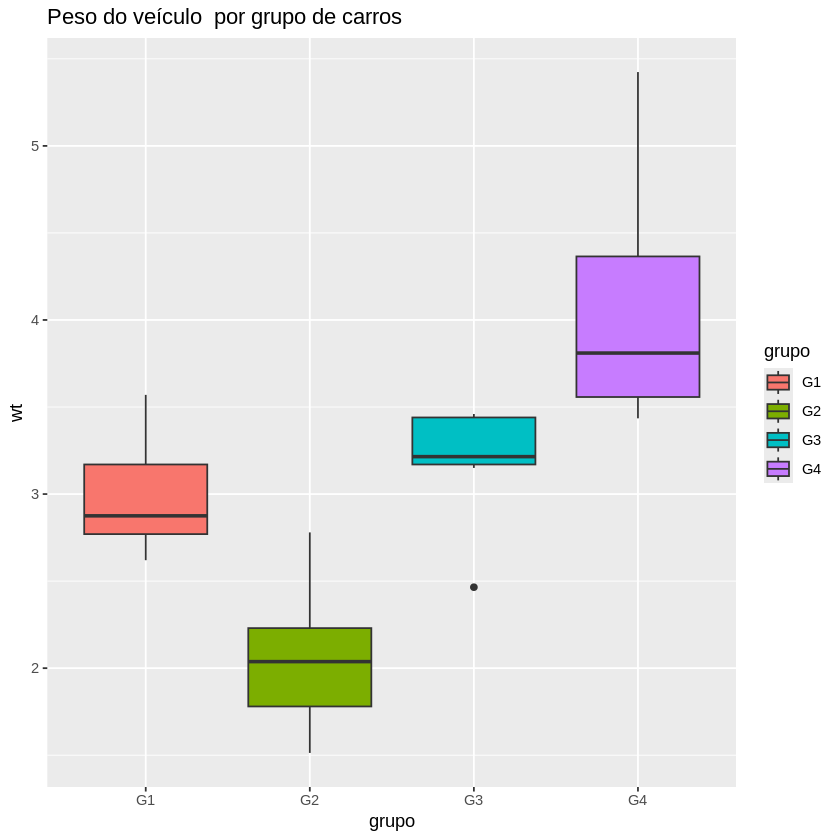

In [106]:
ggplot(novo_df, aes(x=grupo, y=wt, fill=grupo))+
  geom_boxplot() +
ggtitle('Peso do veículo  por grupo de carros')

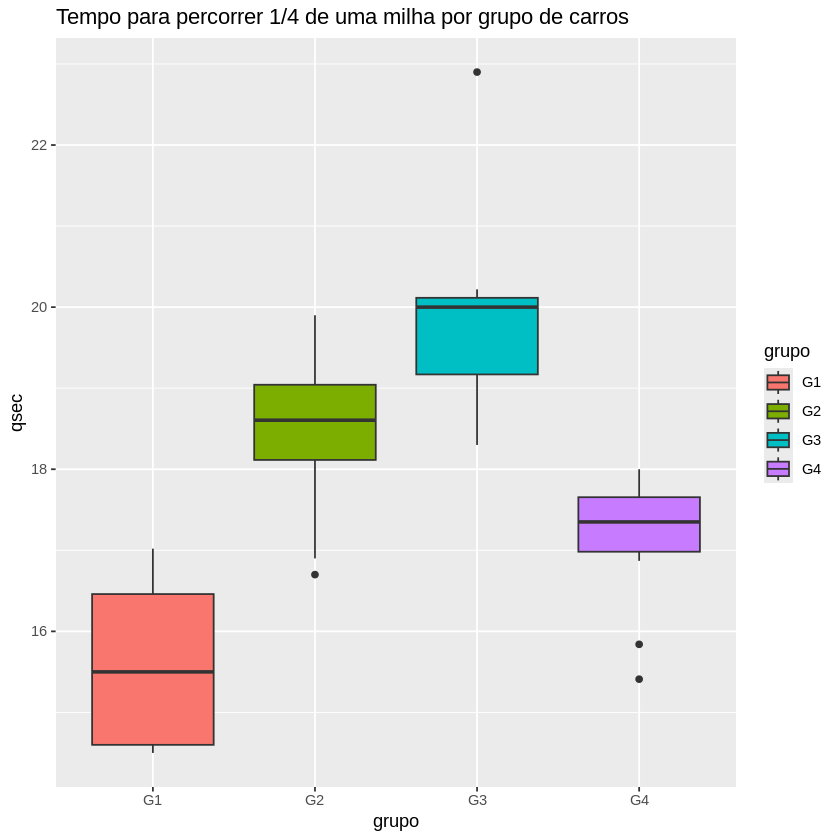

In [107]:
ggplot(novo_df, aes(x=grupo, y=qsec, fill=grupo))+
  geom_boxplot() +
ggtitle('Tempo para percorrer 1/4 de uma milha por grupo de carros')

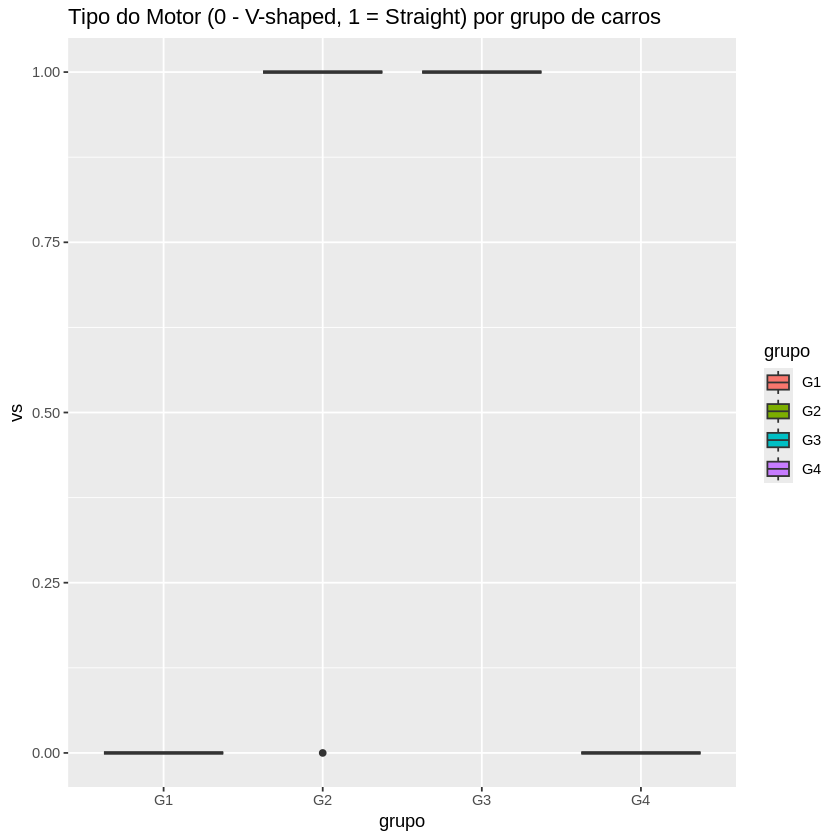

In [108]:
ggplot(novo_df, aes(x=grupo, y=vs, fill=grupo))+
  geom_boxplot() +
ggtitle('Tipo do Motor (0 - V-shaped, 1 = Straight) por grupo de carros')

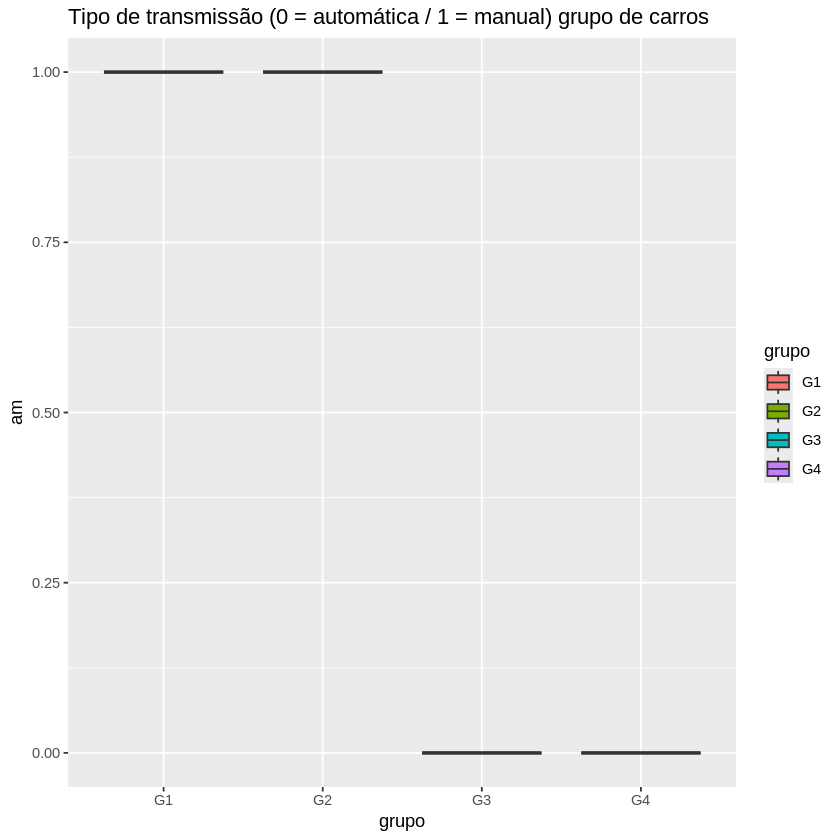

In [109]:
ggplot(novo_df, aes(x=grupo, y=am, fill=grupo))+
  geom_boxplot() +
ggtitle('Tipo de transmissão (0 = automática / 1 = manual) grupo de carros')

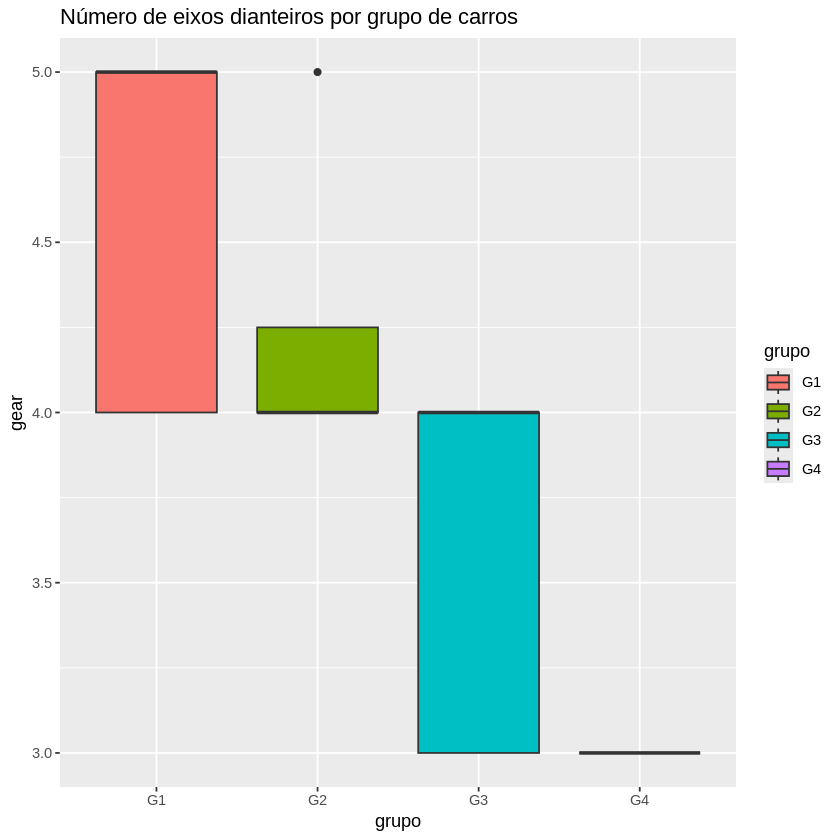

In [110]:
ggplot(novo_df, aes(x=grupo, y=gear, fill=grupo))+
  geom_boxplot() +
ggtitle('Número de eixos dianteiros por grupo de carros')

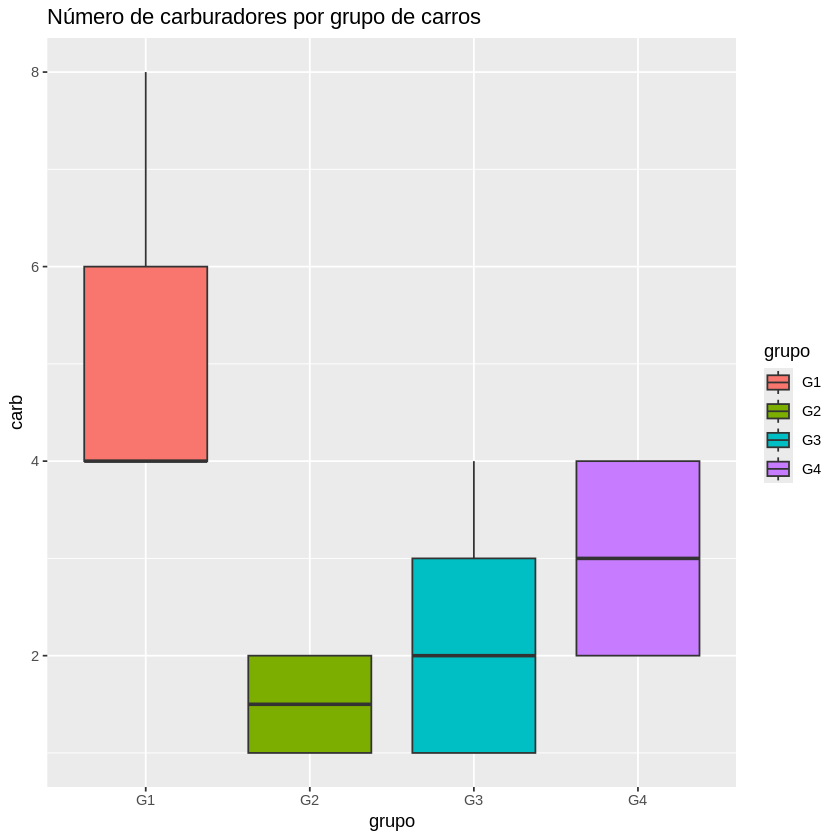

In [111]:
ggplot(novo_df, aes(x=grupo, y=carb, fill=grupo))+
  geom_boxplot() +
ggtitle('Número de carburadores por grupo de carros')

## Dada as análises e agrupamentos, podemos cheagr em algumas conclusões a respeito de cada grupo:

**Grupo 1 ->** Ferrari Dino, Mazda RX4, Mazda RX4 Wag, Ford Pantera L, Maserati Bora. Neste grupo os carros se destacam pelo alto Número de cilíndros, o baixo tempo em percorrer 1/4 de uma milha, motor do tipo V-shaped, transmissão manual e alta quantidade de eixos dianteiros como de carburadores.

**Grupo 2 ->** Porsche 914-2, Lotus Europa, Datsun 710, Volvo 142E, Honda Civic, Fiat X1-9, Fiat 128, Toyota Corolla. Neste grupo os carros se destacam pelo alto número de milhas que conseguem fazer por galão, o baixo número de de cilíndros (todos com 4), o baixo deslocamento do motor, o baixo número de cavalos de potência, a maior razão do eixo traseiro, o menor peso. Além do tipo de transmissão manual, garnde número de eixos dianteiros e por fim, baixo número de carburadores.

**Grupo 3 ->** Hornet 4 Drive, Valiant, Merc 280, Merc 280C, Toyota Corona,Merc 240D, Merc 230. Neste grupo os carros se destacam pelo número de cilíndros entre 4 a 6, o alto tempo para percorrer 1/4 de uma milha, tipo de motor pesado, transmissão automática, baixo número de eixos dianteiros e caburadores.

**Grupo 4 ->** Chrysler Imperial, Cadillac Fleetwood, Lincoln Continental,Duster 360, Camaro Z28, Merc 450SLC, Merc 450SE, Merc 450SL, Hornet Sportabout, Pontiac Firebird, Dodge Challenger, AMC Javelin. Neste grupo, os veículos se destacam pelo baixo número de milhas por galão, alto número de cilíndros, o alto deslocamento do motor, bastante cavalos de potência, baixa razão do eixo traseiro. Veículos pesados de motor V-shaped, transmissão manual e baixo número de eixos dianteiros.